In [4]:
# import required libraries and packages
from qiskit import *
from qiskit.visualization import *
from qiskit.tools.jupyter import *
from math import *
from numpy import *
import random

# print version table
%qiskit_version_table

In [5]:
# create a quantum circuit with 1 qubit and 1 cbit
qc = QuantumCircuit(1,1);

# simply define a single qubit state as a statevector
initial_state = [0,1];

# note qc is initially |0 > but now we are initializing it to our custom state which is |1 > in this case
# the second argument which is 0 in this case is to define which qubit of the circuit to initialize
# and here it is the first qubit
qc.initialize(initial_state, 0);

# save the statevector so that we can display it later
qc.save_statevector();

# run simulation and print the statevector (note I used the alternative way to run the sim with assemble)
# also note I am not measuring yet because I only care about the current statevector
# if I measure then I will collapse the statevector into |0 > or |1 > (in this case only to |1 > but you get the point)
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc);
result = sim.run(qobj).result();
out_state = result.get_statevector();
print(out_state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


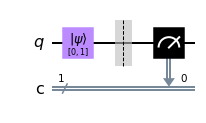

In [6]:
# now we measure 
qc.measure(0,0)

#draw
qc.draw('mpl')

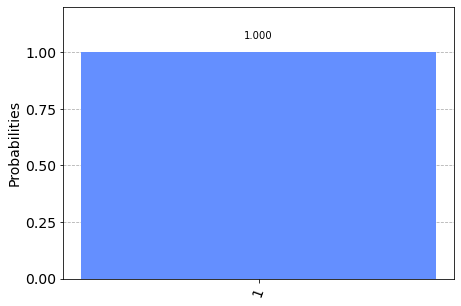

In [7]:
# run a simulation and plot the actual measurement result
qobj = assemble(qc);
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In [8]:
# so everything is as expected and things make sense
# now let us repeat but initialize to a different state

In [9]:
qc = QuantumCircuit(1,1);
initial_state = [1/sqrt(2), 1j/sqrt(2)];
qc.initialize(initial_state, 0);
qc.save_statevector();
qobj = assemble(qc);
result = sim.run(qobj).result();
out_state = result.get_statevector();
print(out_state)

# again notice that I am not measuring because that will collapse the statevector to either |0 > or |1 >
# I want the current statevector so I am running the simulation to get the statevector before measuring

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


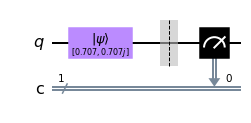

In [10]:
qc.measure(0,0)
qc.draw('mpl')

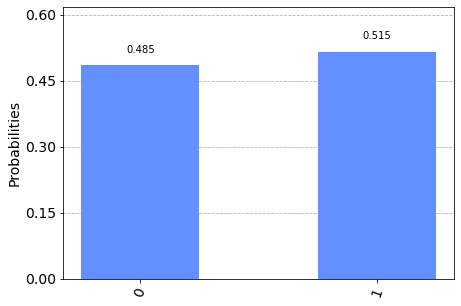

In [11]:
qobj = assemble(qc);
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

In [12]:
# again everything makes sense as one would expect from the measurment postulate of quantum mechanics
# note that when initializing, the statevector must be normalized or you will get an error

In [16]:
# now we will look at bloch vector representations
# general qubit is |psi> = a|0> + b*exp(i*phi)|1> because global phase is not important
# a, b, phi are all real
# sqrt(a^2 + b^2) = 1 because of normalization
# sqrt(sin(theta/2)^2 + cos(theta/2)^2)) = 1
# so |psi> = sin(theta/2)|0> + cos(theta/2)*exp(i*phi)|1>
# theta, phi are real
# 0< theta < pi
# 0< phi < 2*pi
# we can define a radius of 1
# so a state is just a point on the unit sphere with (theta,phi,radius) spherical coordinates

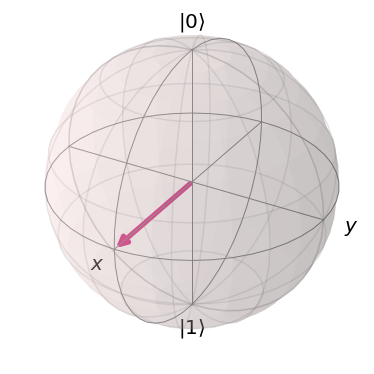

In [17]:
# I first installed the required qiskit textbook stuff separately
# now I am importing the required packages and plotting
from qiskit_textbook.widgets import *
coords = [pi/2,0,1] # [theta, phi, radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates
# so we have an equal superposition of |0> and |1>

In [19]:
# spherical to cartesian converter
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

In [21]:
# a note about quantum simulators:
# writing down a qubit’s state requires keeping track of two complex numbers, 
# but when using a real quantum computer we will only ever receive a yes-or-no (0 or 1) answer for each qubit. 
# The output of a 10-qubit quantum computer will look like this:
# 0110111110
# Just 10 bits, no superposition or complex amplitudes. 
# When using a real quantum computer, we cannot see the states of our qubits mid-computation,
# as this would destroy them! This behaviour is not ideal for learning,
# so Qiskit provides different quantum simulators:
# By default, the aer_simulator mimics the execution of a real quantum computer,
# but will also allow you to peek at quantum states before measurement if we include certain instructions 
# in our circuit. For example, here we have included the instruction .save_statevector(), 
# which means we can use .get_statevector() on the result of the simulation.
# just be aware of this

In [22]:
# other random stuff

from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

In [23]:
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

In [24]:
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

In [25]:
# other random stuff

from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [26]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')